# 강화 학습 실체 6주차 실습 <br/> (2025254002 전양호)

## 실습 1 td_eval.py

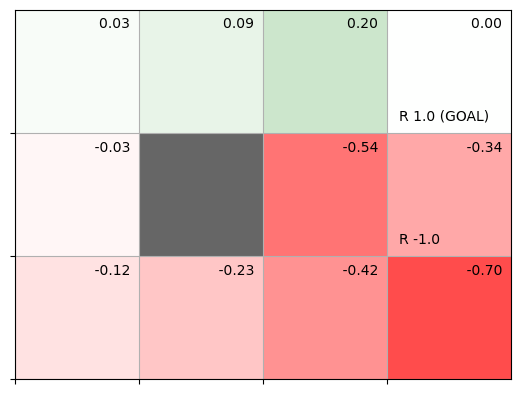

In [19]:
from collections import defaultdict
import numpy as np

import os
import sys
sys.path.append(r'C:\Users\LOQ\OneDrive\개인\2025\충북대학교\CBNU_AI\reinforcement_learning\PythonProject_reforcement_learning\6week\common')
from gridworld import GridWorld

class TdAgent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.01
        self.action_size = 4
        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.V = defaultdict(lambda: 0)

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def eval(self, state, reward, next_state, done):
        # 목표 지점의 가치 함수는 0
        next_V = 0 if done else self.V[next_state]
        target = reward + self.gamma * next_V
        self.V[state] += (target - self.V[state]) * self.alpha

env = GridWorld()
agent = TdAgent()

episodes = 1000
for episode in range(episodes):
    state = env.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.eval(state, reward, next_state, done) # 매 에피소드마다 가치함수 업데이트

        if done:
            break
        state = next_state

# 학습된 가치 함수 시각화
env.render_v(agent.V)

## 실습 #2 sarsa.py

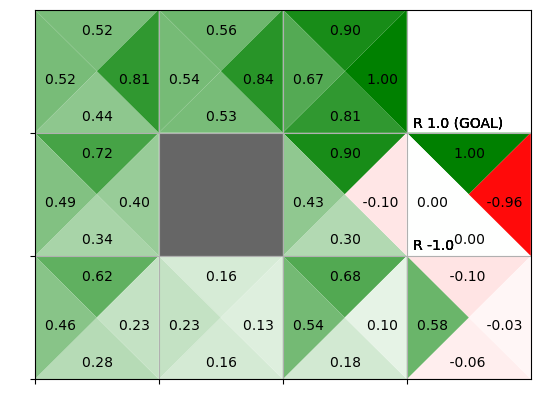

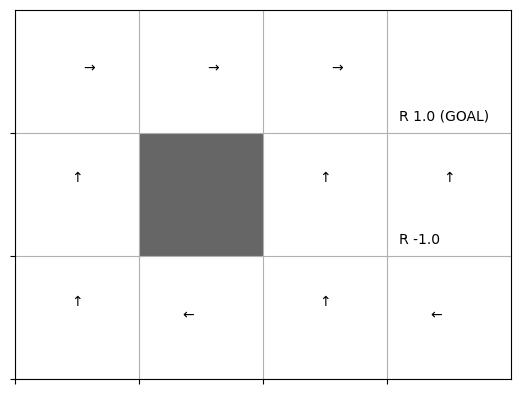

In [8]:
from collections import defaultdict, deque
import numpy as np
import os
import sys


module_path = r'C:\Users\LOQ\OneDrive\개인\2025\충북대학교\CBNU_AI\reinforcement_learning\PythonProject_reforcement_learning\6week\common'
sys.path.append(module_path)
from gridworld import GridWorld
from utils import greedy_probs

class SarsaAgent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.8
        self.epsilon = 0.1
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
        self.memory = deque(maxlen=2) # deque 사용

    def get_action(self, state):
        action_probs = self.pi[state] # pi에서 선택
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def reset(self):
        self.memory.clear()

    def update(self, state, action, reward, done):
        self.memory.append((state, action, reward, done))
        if len(self.memory) < 2:
            return

        state, action, reward, done = self.memory[0]
        next_state, next_action, _, _ = self.memory[1]
        next_q = 0 if done else self.Q[next_state, next_action] # 다음 Q 함수

        # TD법으로 self.Q 갱신
        target = reward + self.gamma * next_q
        self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

        # 정책 개선
        self.pi[state] = greedy_probs(self.Q, state, self.epsilon)

# === 학습 코드 부분 ===
env = GridWorld()
agent = SarsaAgent()

episodes = 10000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.update(state, action, reward, done) # 매번 호출

        if done:
            # 목표에 도달했을 때도 호출
            agent.update(next_state, None, None, None)
            break
        state = next_state

# 시각화 (필요시 주석 해제)
env.render_q(agent.Q)

## 실습 3 q_learning.py

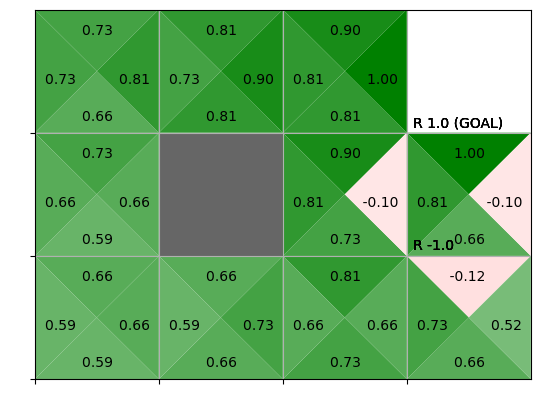

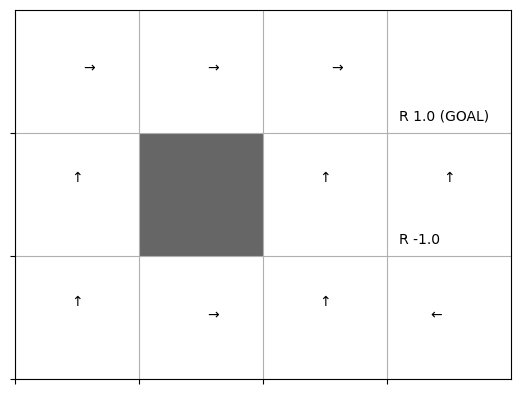

In [15]:
from collections import defaultdict
import numpy as np
import sys
import os

module_path = r'C:\Users\LOQ\OneDrive\개인\2025\충북대학교\CBNU_AI\reinforcement_learning\PythonProject_reforcement_learning\6week\common'
sys.path.append(module_path)
from gridworld import GridWorld
from utils import greedy_probs

class QLearningAgent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.8
        self.epsilon = 0.1
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.b = defaultdict(lambda: random_actions) # 행동 정책
        self.Q = defaultdict(lambda: 0)

    def get_action(self, state):
        action_probs = self.b[state] # 행동 정책에서 가져옴
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def update(self, state, action, reward, next_state, done):
        if done: # 목표에 도달
            next_q_max = 0
        else: # 그 외에는 다음 상태에서 Q 함수의 최댓값 계산
            next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
            next_q_max = max(next_qs)

        # Q 함수 갱신
        target = reward + self.gamma * next_q_max
        self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

        # 행동 정책 갱신
        self.b[state] = greedy_probs(self.Q, state, self.epsilon)

env = GridWorld()
agent = QLearningAgent()

episodes = 10000
for episode in range(episodes):
    state = env.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.update(state, action, reward, next_state, done)
        if done:
            break
        state = next_state

# 시각화
env.render_q(agent.Q)